In [1]:
import os
import cv2
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pywt


In [3]:
data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"

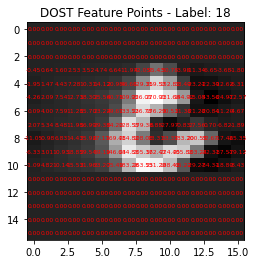

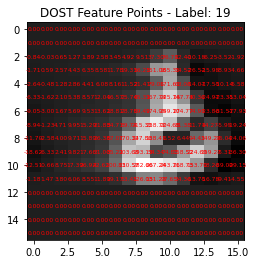

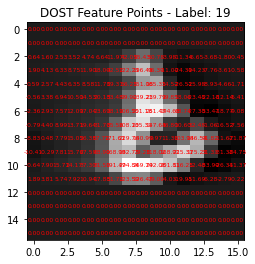

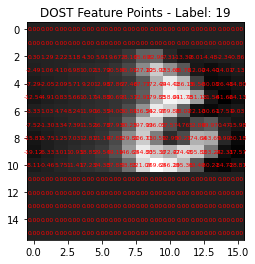

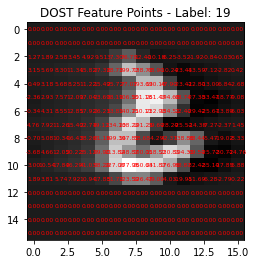

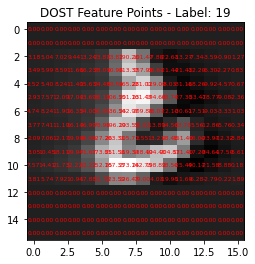

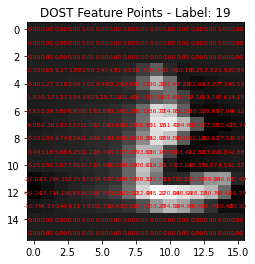

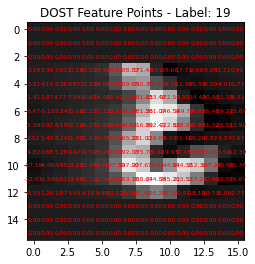

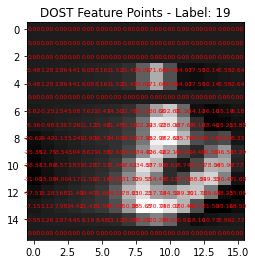

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
num_images_processed = 0
max_images_per_class = 10

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (16, 16))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dost_result = dost(gray)

    plt.imshow(dost_result, cmap='gray')
    plt.title(f'DOST Feature Points - Label: {label}')

    for i in range(dost_result.shape[0]):
        for j in range(dost_result.shape[1]):
            value = dost_result[i, j]
            plt.text(j, i, f'{value:.2f}', color='red', fontsize=6, ha='center', va='center')

    plt.show()


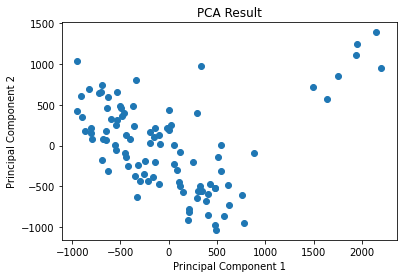

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
num_images_processed = 0
max_images_per_class = 100

features = []

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (32, 32))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dost_result = dost(gray)

    features.append(dost_result.flatten())

features = np.array(features)

pca = PCA(n_components=28)
pca_result = pca.fit_transform(features)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


Accuracy: 0.7366071428571429


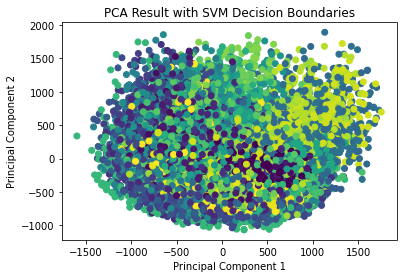

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
num_images_processed = 0
max_images_per_class = 60000

features = []
labels = []

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (32, 32))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dost_result = dost(gray)

    features.append(dost_result.flatten())
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

pca = PCA(n_components=28)
pca_result = pca.fit_transform(features)

label_indices = np.unique(labels, return_inverse=True)[1]

X_train, X_test, y_train, y_test = train_test_split(pca_result, label_indices, test_size=0.2, random_state=42)

svm = SVC()

svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=label_indices, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with SVM Decision Boundaries')
plt.show()


Accuracy: 0.7373511904761905


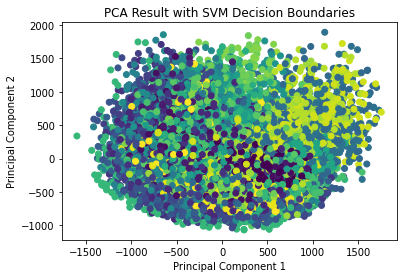

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
num_images_processed = 0
max_images_per_class = 60000

features = []
labels = []

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (32, 32))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dost_result = dost(gray)

    features.append(dost_result.flatten())
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

pca = PCA(n_components=28)
pca_result = pca.fit_transform(features)

pca_components = pca.components_

label_indices = np.unique(labels, return_inverse=True)[1]

X_train, X_test, y_train, y_test = train_test_split(pca_result, label_indices, test_size=0.2, random_state=42)

svm = SVC()

svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=label_indices, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with SVM Decision Boundaries')
plt.show()


In [8]:
import os
import cv2
import numpy as np

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
max_images_per_class = 6000

unique_labels = set()

num_images_processed = 0
for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    label = img_file.name.split('_')[-1][:-4]
    unique_labels.add(label)

num_unique_labels = len(unique_labels)
print(f"Number of unique labels: {num_unique_labels}")


Number of unique labels: 28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC curve of class 0 (AUC = 1.00)
ROC curve of class 1 (AUC = 0.99)
ROC curve of class 2 (AUC = 0.99)
ROC curve of class 3 (AUC = 0.99)
ROC curve of class 4 (AUC = 0.99)
ROC curve of class 5 (AUC = 0.99)
ROC curve of class 6 (AUC = 0.99)
ROC curve of class 7 (AUC = 0.99)
ROC curve of class 8 (AUC = 0.98)
ROC curve of class 9 (AUC = 0.97)
ROC curve of class 10 (AUC = 0.99)
ROC curve of class 11 (AUC = 1.00)
ROC curve of class 12 (AUC = 0.98)
ROC curve of class 13 (AUC = 0.98)
ROC curve of class 14 (AUC = 0.99)
ROC curve of class 15 (AUC = 1.00)
ROC curve of class 16 (AUC = 1.00)
ROC curve of class 17 (AUC = 0.98)
ROC curve of class 18 (AUC = 0.99)
ROC curve of class 19 (AUC = 0.99)
ROC curve of class 20 (AUC = 0.99)
ROC curve of class 21 (AUC = 0.98)
ROC curve of class 22 (AUC = 0.99)
ROC curve of class 23 (AUC = 0.99)
ROC curve of class 24 (AUC = 0.98)
ROC curve of class 25 (AUC = 0.97)
ROC curve of class 26 (AUC = 0.98)
ROC curve of class 27 (AUC = 0.99)


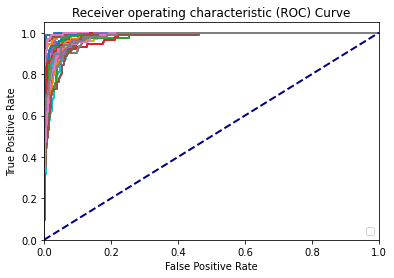

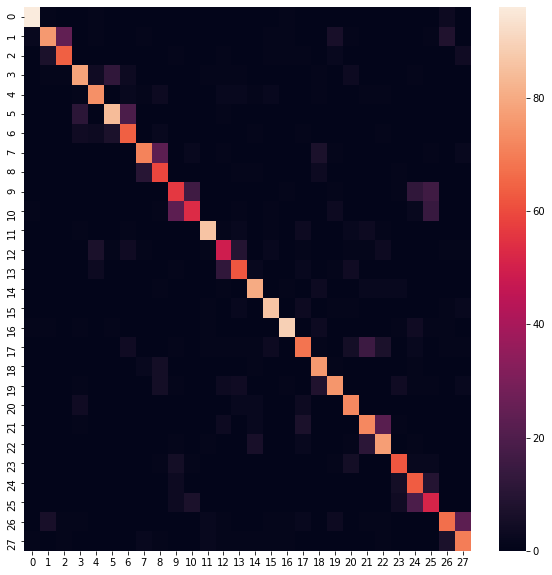

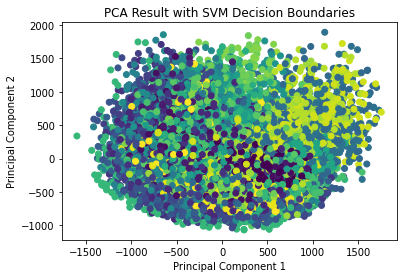

Accuracy: 0.7366071428571429


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.metrics import confusion_matrix

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

def apply_dost(images):
    dost_results = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dost_result = dost(gray)
        dost_results.append(dost_result.flatten())
    return np.array(dost_results)

def apply_pca(features, n_components=28):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)
    return pca_result

def train_svm(features, labels, test_size=0.2, random_state=42):
    label_indices = np.unique(labels, return_inverse=True)[1]
    X_train, X_test, y_train, y_test = train_test_split(features, label_indices, test_size=test_size, random_state=random_state)
    svm = SVC(probability=True)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    y_prob = svm.predict_proba(X_test)
    y_pred = svm.predict(X_test)
    y_test_bin = label_binarize(y_test, classes=svm.classes_)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(svm.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    lw = 2
    for i in range(len(svm.classes_)):
        plt.plot(fpr[i], tpr[i], lw=lw)
        print('ROC curve of class {0} (AUC = {1:0.2f})'.format(svm.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_pred, y_test))
    plt.show()
    return svm, accuracy

def visualize_results(pca_result, label_indices):
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=label_indices, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result with SVM Decision Boundaries')
    plt.show()

data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
max_images_per_class = 60000

features = []
labels = []
num_images_processed = 0

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (32, 32))

    features.append(img)
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

dost_features = apply_dost(features)

pca_result = apply_pca(dost_features, n_components=28)

svm_model, accuracy = train_svm(pca_result, labels)

visualize_results(pca_result, label_indices)
print(f"Accuracy: {accuracy}")


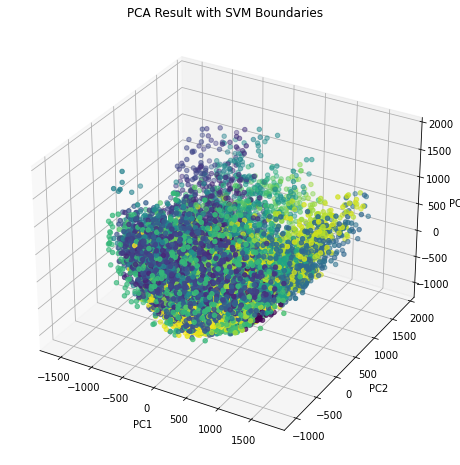

Accuracy: 0.6458333333333334


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def dost(x):
    n = len(x)
    t = np.linspace(0, 1, n)
    w = np.exp(-2j * np.pi * t ** 2)
    X = np.fft.fft(x)
    Y = w * X
    y = np.fft.ifft(Y)
    return np.real(y)

def apply_dost(images):
    dost_results = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dost_result = dost(gray)
        dost_results.append(dost_result.flatten())
    return np.array(dost_results)

def apply_pca(features, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)
    return pca_result

def train_random_forest(features, labels, test_size=0.2, random_state=42):
    label_indices = np.unique(labels, return_inverse=True)[1]
    X_train, X_test, y_train, y_test = train_test_split(features, label_indices, test_size=test_size, random_state=random_state)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    accuracy = rf.score(X_test, y_test)
    return rf, accuracy

def visualize_results(pca_result, label_indices):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d', )
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=label_indices, cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('PCA Result with SVM Boundaries')
    plt.show()


data_dir = "C:/Users/tmvis/OneDrive/Desktop/Arabic/archive (14)/Train Images 13440x32x32/train"
max_images_per_class = 60000

features = []
labels = []
num_images_processed = 0

for img_file in os.scandir(data_dir):
    if not img_file.name.endswith('.png'):
        continue

    num_images_processed += 1
    if num_images_processed >= max_images_per_class:
        break

    img = cv2.imread(img_file.path)
    label = img_file.name.split('_')[-1][:-4]

    img = cv2.resize(img, (32, 32))

    features.append(img)
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

dost_features = apply_dost(features)

pca_result = apply_pca(dost_features, n_components=28)

rf_model, accuracy = train_random_forest(pca_result, labels)

visualize_results(pca_result, label_indices)
print(f"Accuracy: {accuracy}")
